In [124]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5
T = 2.0
h = 0.001
tau = 0.05
x_start, x_end = 0.0, 1.0
Co = a * tau / h**2


a1, b1, c1 = -1, 1, 1
a2, b2, c2 = -np.cos(1), 1 + np.sin(1), np.cos(1)


def f(t, x):
    return 0.5 * np.sin(x) * (3 + t) + 1


def exact_solv(t, x):
    return (t + 1) * np.sin(x) + t


M = int((x_end - x_start) / h) + 1
N = int(T / tau) + 1

x = np.linspace(x_start, x_end, M)
t = np.linspace(0, T, N)

u = np.zeros((N, M))
u_exact = np.zeros((N, M))
mistakes = np.zeros((N, M))

#НУ
for i in range(M):
    u[0, i] = np.sin(x[i])
    u_exact[0, i] = exact_solv(0, x[i])
    mistakes[0, i] = abs(u_exact[0, i] - u[0, i])


def progonka(A, d):
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    x = np.zeros(n)

    alpha[1] = -A[0, 1] / A[0, 0]
    beta[1] = d[0] / A[0, 0]

    for i in range(1, n - 1):
        denom = A[i, i] + A[i, i - 1] * alpha[i]
        alpha[i + 1] = -A[i, i + 1] / denom
        beta[i + 1] = (d[i] - A[i, i - 1] * beta[i]) / denom

    x[-1] = (d[-1] - A[-1, -2] * beta[-1]) / (A[-1, -1] + A[-1, -2] * alpha[-1])

    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x


def build_matrix(u_prev):
    A = np.zeros((M, M))
    b = np.zeros(M)

    #Левая
    A[0, 0] = a1 - b1 / h
    A[0, 1] = b1 / h - b1 / (h * Co)
    b[0] = c1 - 0.5 * b1 * u_prev[0] / h \
           - b1 * (1 - Co) * u_prev[1] / (h * Co) \
           - 0.5 * b1 * u_prev[2] / h \
           - tau * b1 * (f(t[i], x[1]) + f(t[i - 1], x[1])) / (2 * h * Co)

    #Правая
    A[M - 1, M - 2] = b2 * (1 - Co) / (h * Co)
    A[M - 1, M - 1] = a2 + b2 / h
    b[M - 1] = c2 + 0.5 * b2 * u_prev[M - 3] / h \
               + b2 * (1 - Co) * u_prev[M - 2] / (h * Co) \
               + 0.5 * b2 * u_prev[M - 1] / h \
               + 0.5 * b2 * tau * (f(t[i], x[M - 2]) + f(t[i - 1], x[M - 2])) / (h * Co)

    #Внутреннее
    for k in range(1, M - 1):
        A[k, k - 1] = -0.5 * Co
        A[k, k] = Co + 1
        A[k, k + 1] = -0.5 * Co
        b[k] = 0.5 * Co * u_prev[k - 1] + (1 - Co) * u_prev[k] + 0.5 * Co * u_prev[k + 1] \
               + 0.5 * tau * (f(t[i], x[k]) + f(t[i - 1], x[k]))

    return A, b




for i in range(1, N):
    A, b = build_matrix(u[i - 1])
    u[i] = progonka(A, b)

    for j in range(0, M):
        u_exact[i, j] = exact_solv(t[i], x[j])
        mistakes[i, j]= abs(u_exact[i, j] - u[i, j])
print (h)


0.001


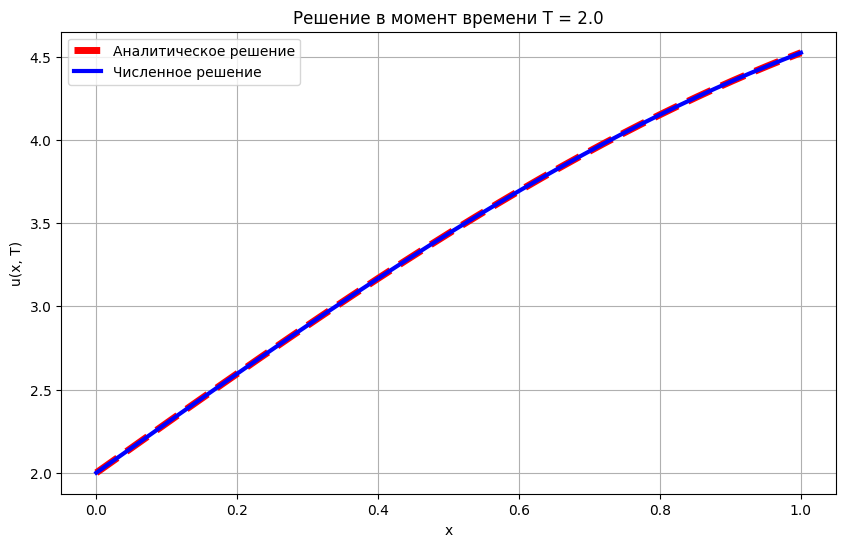

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(x, u_exact[N-1, :], label='Аналитическое решение', color='red', linestyle='--', linewidth=5)
plt.plot(x, u[N-1, :], label='Численное решение', color='blue', linestyle='-', linewidth=3)

plt.title(f'Решение в момент времени T = {T}')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.grid(True)

plt.show()


# max_mistake = max(np.max(row) for row in mistakes)
# print(f"Максимальная ошибка: {max_mistake}")

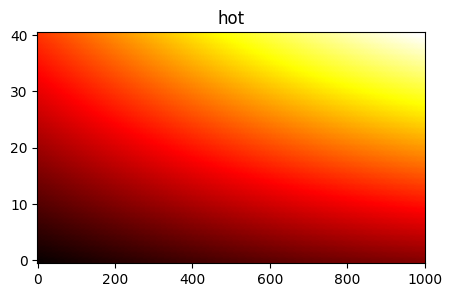

In [126]:
# array=['Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r']
c='hot'
plt.figure(figsize=(5, 3))
plt.title(f'{c}')
plt.imshow(u, aspect='auto', cmap=c, origin='lower')

In [127]:
max_mistake = max(np.max(row) for row in mistakes)
print (max_mistake, " h=", h)

3.897030813604374e-07  h= 0.001


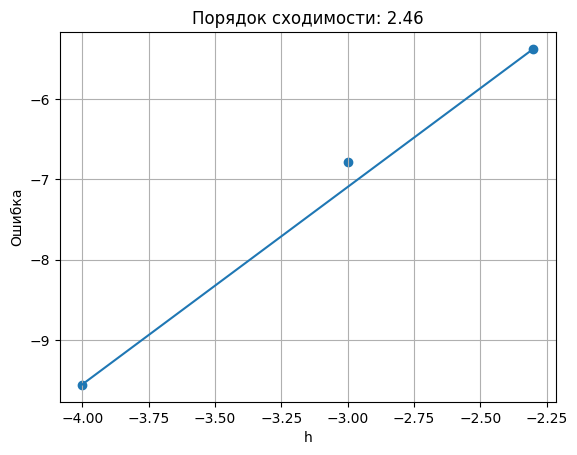

In [129]:
#считаю ошибки при разных шагах h
#t=0.05
Mistakes = np.log10( np.array([2.75562905827087e-10,  1.6257083146342666e-07, 4.137655777114446e-06]))
H= np.log10( np.array([0.0001, 0.001, 0.005]))
order = abs(((Mistakes[0])-(Mistakes[-1]))/((H[0])-(H[-1])))
plt.scatter(H, Mistakes)
plt.plot(H, order*H+0.28)
plt.ylabel('Ошибка')
plt.xlabel('h')
plt.title(f'Порядок сходимости: {order:.2f}') 
plt.grid(True)

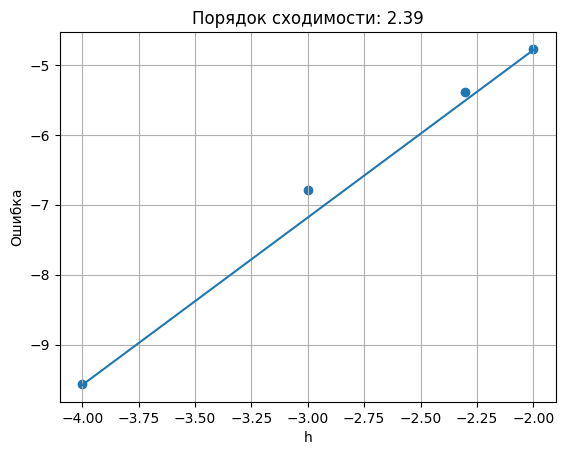

In [130]:
#t=0.005
Mistakes =np.log10( np.array([2.75562905827087e-10, 1.6239663658268455e-07, 4.135674195993033e-06, 1.6911147745268806e-05]))
H=np.log10(np.array([0.0001,0.001, 0.005, 0.01]))
order = abs(((Mistakes[0])-(Mistakes[-1]))/((H[0])-(H[-1])))
plt.scatter(H, Mistakes)
plt.ylabel('Ошибка')
plt.xlabel('h')
plt.plot(H, order*H)
plt.title(f'Порядок сходимости: {order:.2f}') 
plt.grid(True)